In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

sample = pd.read_csv("/kaggle/input/playground-series-s5e1/sample_submission.csv")
df = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")
train = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")

In [2]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month_name()
df['day'] = pd.DatetimeIndex(df['date']).day

In [3]:
df

,id,date,country,store,product,num_sold,year,month,day
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,January,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,January,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,January,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,January,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,January,1
...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,December,31
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,December,31
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,December,31
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,December,31


In [4]:
df["country"].unique()

array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
      dtype=object)

In [5]:
total_country = df["country"].value_counts()
total_country

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [6]:
total_stickers = df["product"].value_counts()
total_stickers

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

In [7]:
total_stores = df["store"].value_counts()
total_stores

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [8]:
total_country_diff = df.query('country == "Canada"')
total_country_diff

,id,date,country,store,product,num_sold,year,month,day
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,January,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,January,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,January,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,January,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,January,1
...,...,...,...,...,...,...,...,...,...
230050,230050,2016-12-31,Canada,Premium Sticker Mart,Holographic Goose,309.0,2016,December,31
230051,230051,2016-12-31,Canada,Premium Sticker Mart,Kaggle,2170.0,2016,December,31
230052,230052,2016-12-31,Canada,Premium Sticker Mart,Kaggle Tiers,1711.0,2016,December,31
230053,230053,2016-12-31,Canada,Premium Sticker Mart,Kerneler,938.0,2016,December,31


In [9]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_order

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [10]:
spe_sale = df.query('country == "Finland" & store == "Stickers for Less" & product == "Kerneler" & num_sold !="NaN" & year == 2016')
data = spe_sale
data

,id,date,country,store,product,num_sold,year,month,day
197213,197213,2016-01-01,Finland,Stickers for Less,Kerneler,777.0,2016,January,1
197303,197303,2016-01-02,Finland,Stickers for Less,Kerneler,756.0,2016,January,2
197393,197393,2016-01-03,Finland,Stickers for Less,Kerneler,718.0,2016,January,3
197483,197483,2016-01-04,Finland,Stickers for Less,Kerneler,575.0,2016,January,4
197573,197573,2016-01-05,Finland,Stickers for Less,Kerneler,599.0,2016,January,5
...,...,...,...,...,...,...,...,...,...
229703,229703,2016-12-27,Finland,Stickers for Less,Kerneler,711.0,2016,December,27
229793,229793,2016-12-28,Finland,Stickers for Less,Kerneler,790.0,2016,December,28
229883,229883,2016-12-29,Finland,Stickers for Less,Kerneler,757.0,2016,December,29
229973,229973,2016-12-30,Finland,Stickers for Less,Kerneler,844.0,2016,December,30


In [ ]:
data_heatmap = data.pivot(index='day',columns='month',values='num_sold')
plt.figure(figsize=(16,8))
sns.heatmap(data = data_heatmap,annot=True, fmt=".1f", linecolor='white', cmap="crest",  linewidth=.5,  xticklabels = month_order)
plt.title("{product} SALES IN {country} of {store} EVERY YEAR ON {year}")

['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']


Type the country you wish to see the sales:  Norway


['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


Type the product name you wish to see the sales:  Kaggle


['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']


Type the store you wish to see the sales:  Discount Stickers


[2010 2011 2012 2013 2014 2015 2016]


Type the year you wish to see the sales:  2015


Text(0.5, 1.0, 'Kaggle SALES IN Norway of Discount Stickers EVERY MONTH ON 2015')

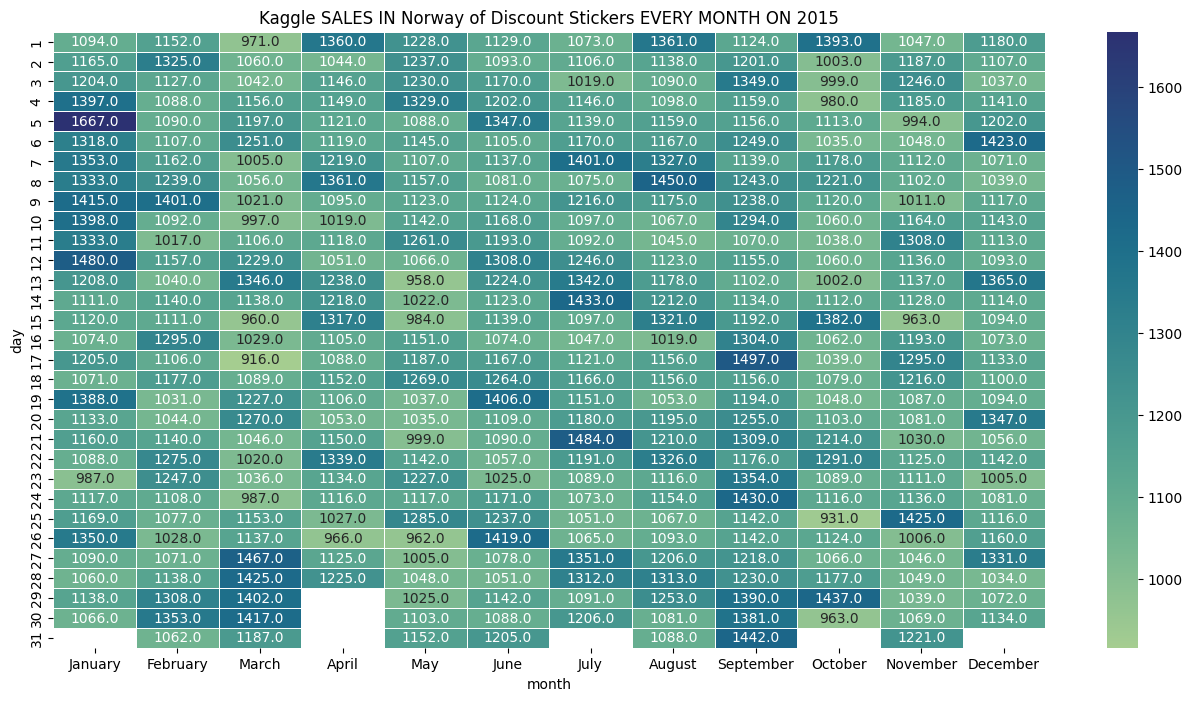

In [11]:
print(df["country"].unique())
country1 = input("Type the country you wish to see the sales: ")

print(df["product"].unique())
product1 = input("Type the product name you wish to see the sales: ")

print(df["store"].unique())
store1 = input("Type the store you wish to see the sales: ")

print(df["year"].unique())
year1 = input("Type the year you wish to see the sales: ")
   


def spec_sale(country1, product1, store1, year1):
 return(df.query(f'country == "{country1}" & store == "{store1}" & product == "{product1}" & num_sold !="NaN" & year =={year1}'))
data_spec = spec_sale(f"{country1}", f"{product1}", f"{store1}", f"{year1}")

data_heatmap = data_spec.pivot(index='day',columns='month',values='num_sold')
plt.figure(figsize=(16,8))
sns.heatmap(data = data_heatmap,annot=True, fmt=".1f", linecolor='white', cmap="crest",  linewidth=.5, xticklabels = month_order)
plt.title(f"{product1} SALES IN {country1} of {store1} EVERY MONTH ON {year1}")

